In [1]:
# 最终画图选的参数：
# DG 10 2 6
# EG 10 2 3
# zebrafish 20 2 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import scvelo as scv
from torch.optim import SGD, Adam, Adagrad
from function import *

from utils import *
from g2g_model_Fisher import *


In [3]:
data_path = "/home/linux/桌面/SCIM-main/main/data/branch_data/"
path_path = "/home/linux/桌面/Is single cell sloppy?/4_FI_vs_Velocity/RC_path/"
figure_path="/home/linux/桌面/Is single cell sloppy?/14_画图/figure/velocity/"
cmap = plt.colormaps['Spectral_r']
save = True

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
AnnData object with n_obs × n_vars = 3386 × 600
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'celltype', 'umap_1', 'umap_2', 'batch', 'n_counts'
    var: 'n_cells', 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'Cell_type_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity', 'variance_velocity'
    obsp: 'connectivities', 'distanc

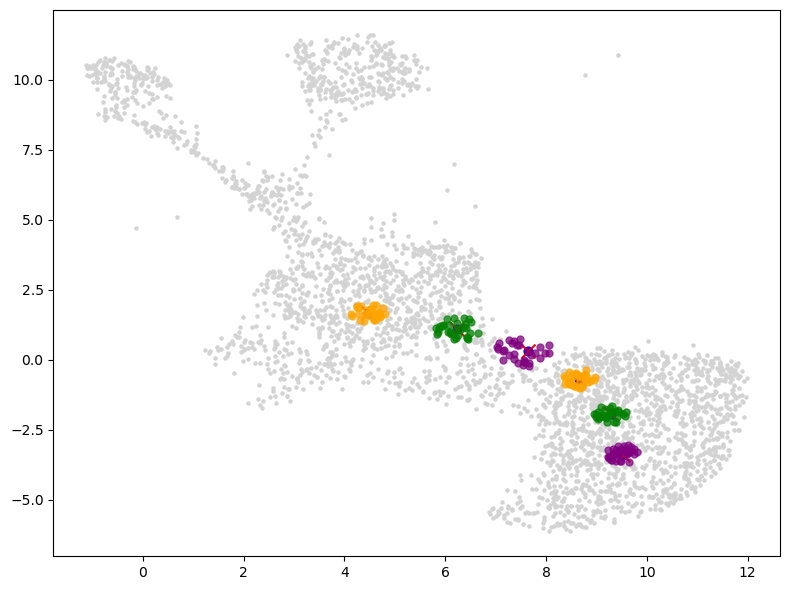

用的color_dict是： {'Melanophore': '#279e68', 'Other Glia': '#aa40fc', 'Pigment Progenitor': '#8c564b', 'Proliferating Progenitor': '#e377c2', 'Schwann Cell': '#17becf', 'Schwann Cell Precursor': '#aec7e8', 'Xanthophore': '#98df8a'}
用的celltype_colors是： ['#17becf', '#17becf', '#17becf', '#17becf', '#17becf', '#279e68', '#279e68', '#aec7e8', '#e377c2', '#98df8a', '#279e68', '#279e68', '#98df8a', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#98df8a', '#aec7e8', '#17becf', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#8c564b', '#279e68', '#17becf', '#17becf', '#17becf', '#279e68', '#98df8a', '#17becf', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#98df8a', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#279e68', '#17becf', '#279e68', '#98df8a', '#279e68', '#17becf', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#98df8a', '#

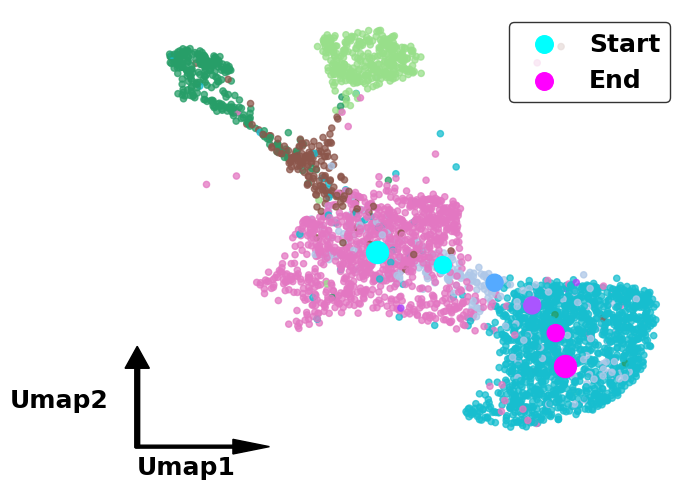

(3386,)
(3386,)
(30,)
(30,)


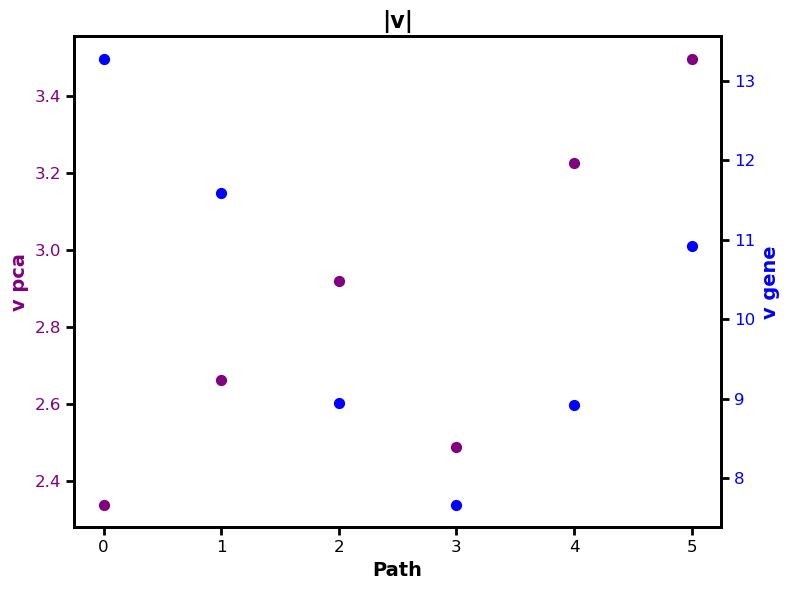

现在是直接用.autograd()求导的：


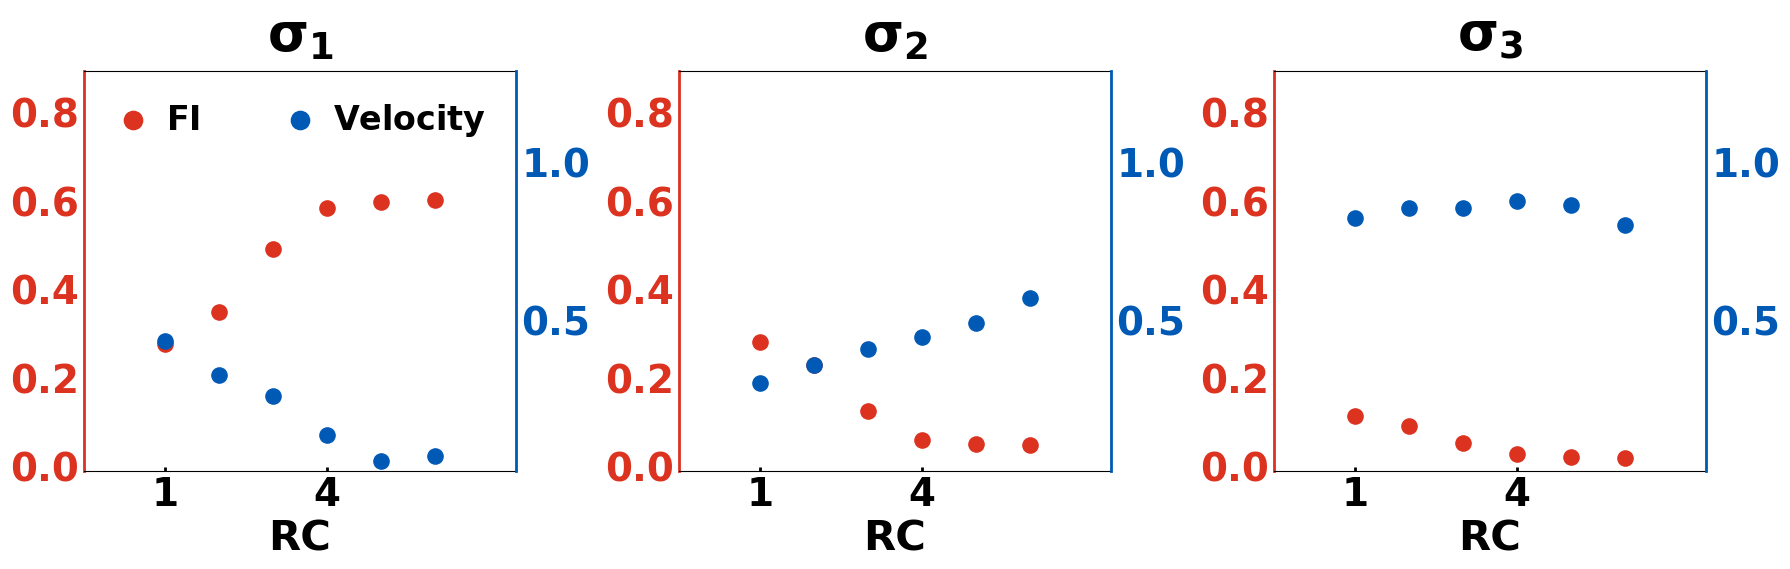

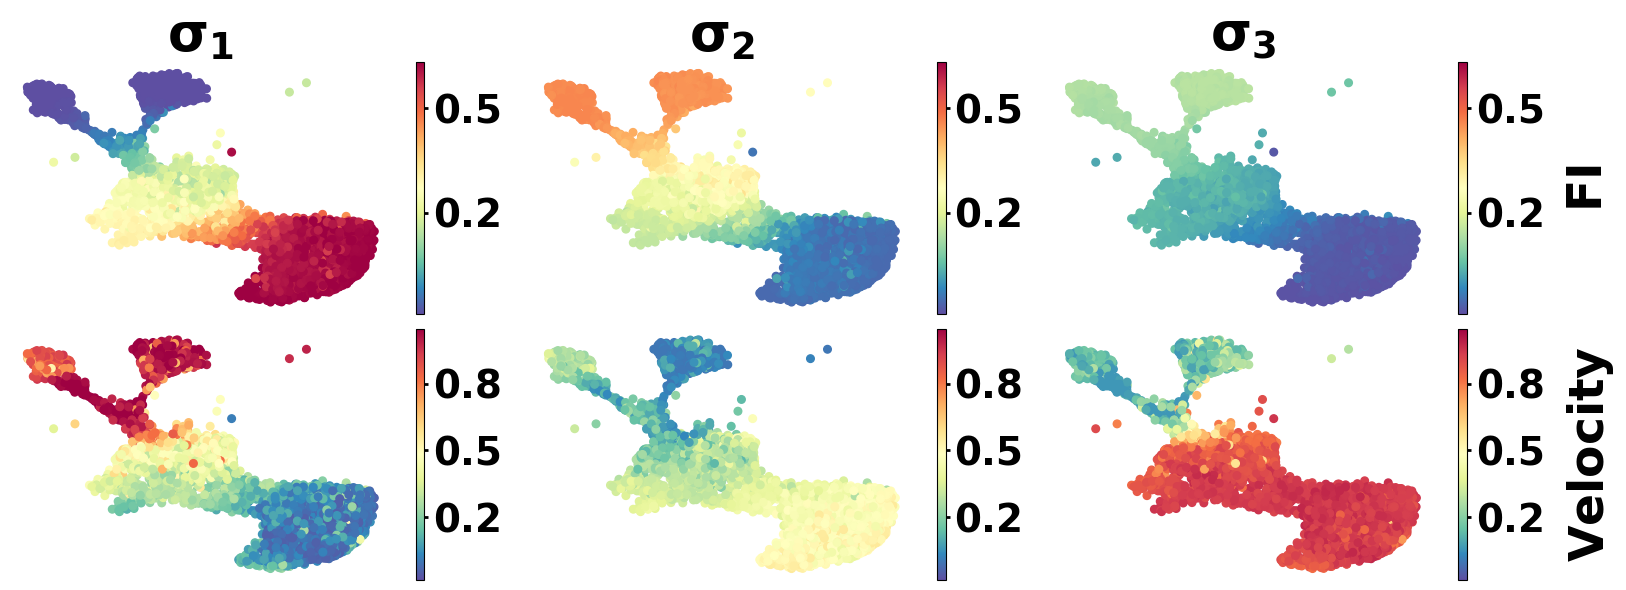

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
AnnData object with n_obs × n_vars = 3386 × 600
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'celltype', 'umap_1', 'umap_2', 'batch', 'n_counts'
    var: 'n_cells', 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'Cell_type_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity', 'variance_velocity'
    obsp: 'connectivities', 'distanc

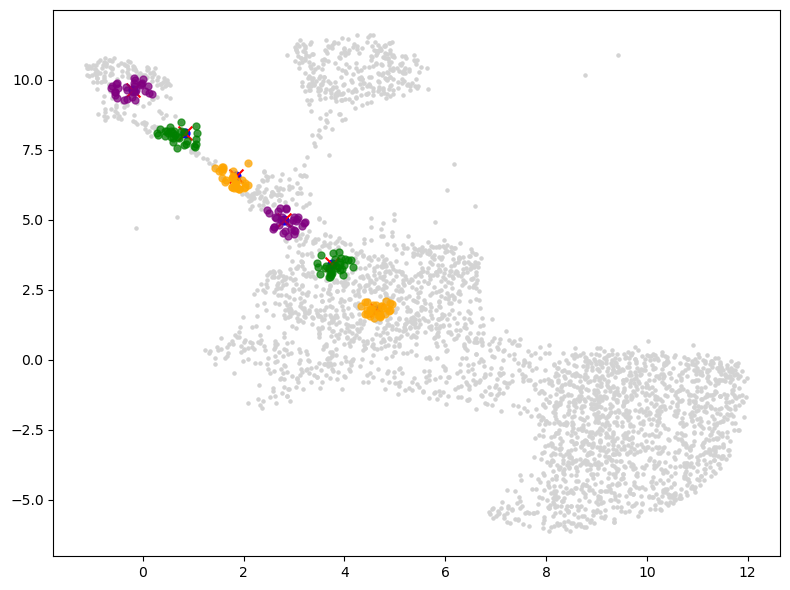

用的color_dict是： {'Melanophore': '#279e68', 'Other Glia': '#aa40fc', 'Pigment Progenitor': '#8c564b', 'Proliferating Progenitor': '#e377c2', 'Schwann Cell': '#17becf', 'Schwann Cell Precursor': '#aec7e8', 'Xanthophore': '#98df8a'}
用的celltype_colors是： ['#17becf', '#17becf', '#17becf', '#17becf', '#17becf', '#279e68', '#279e68', '#aec7e8', '#e377c2', '#98df8a', '#279e68', '#279e68', '#98df8a', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#98df8a', '#aec7e8', '#17becf', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#8c564b', '#279e68', '#17becf', '#17becf', '#17becf', '#279e68', '#98df8a', '#17becf', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#98df8a', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#279e68', '#17becf', '#279e68', '#98df8a', '#279e68', '#17becf', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#98df8a', '#

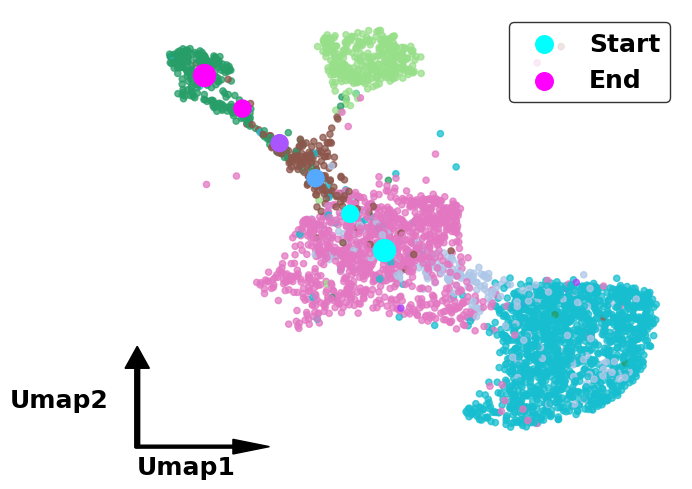

(3386,)
(3386,)
(30,)
(30,)


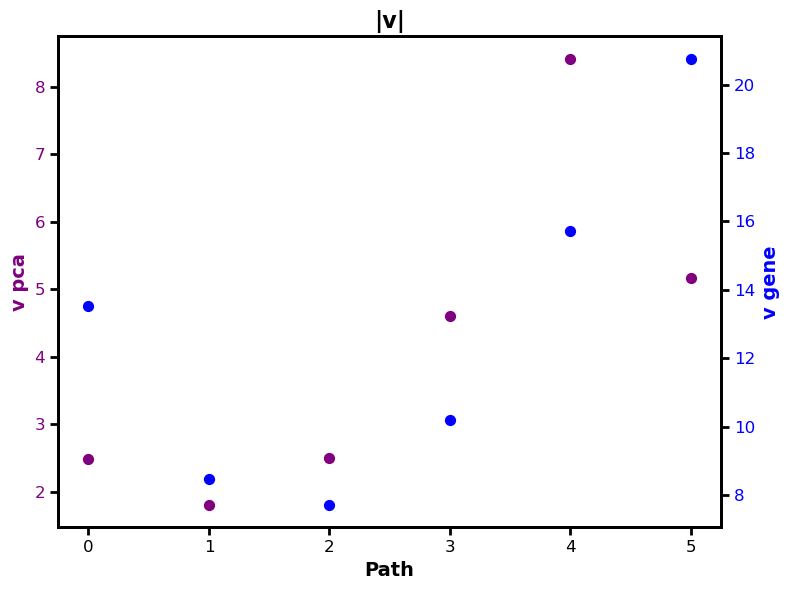

现在是直接用.autograd()求导的：


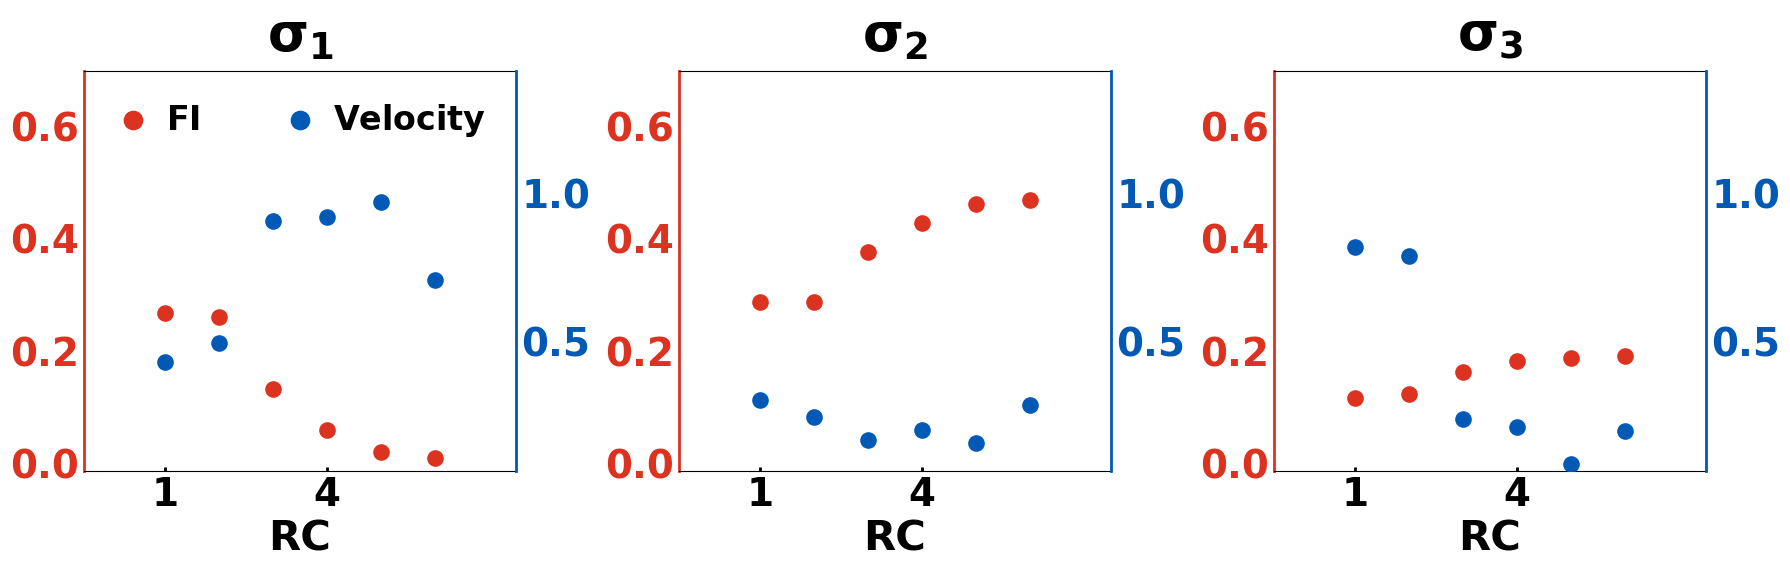

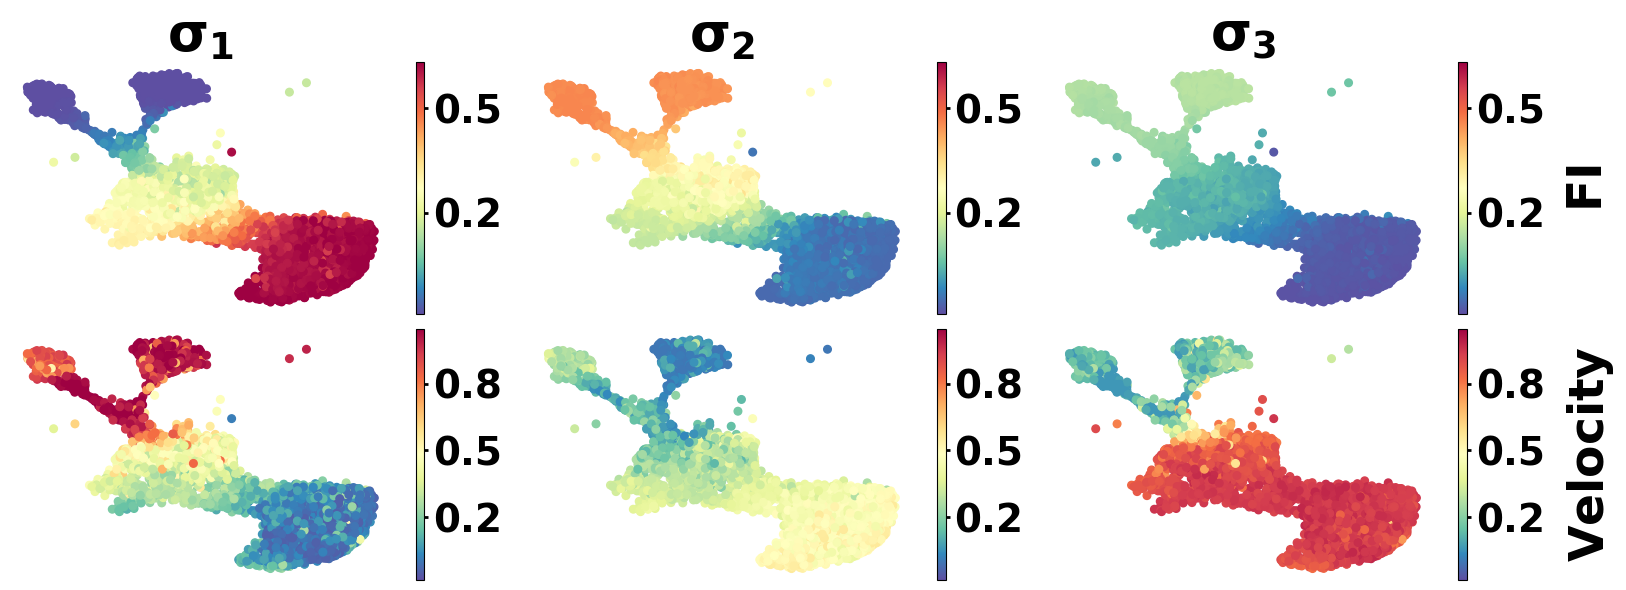

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
AnnData object with n_obs × n_vars = 3386 × 600
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'celltype', 'umap_1', 'umap_2', 'batch', 'n_counts'
    var: 'n_cells', 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'Cell_type_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity', 'variance_velocity'
    obsp: 'connectivities', 'distanc

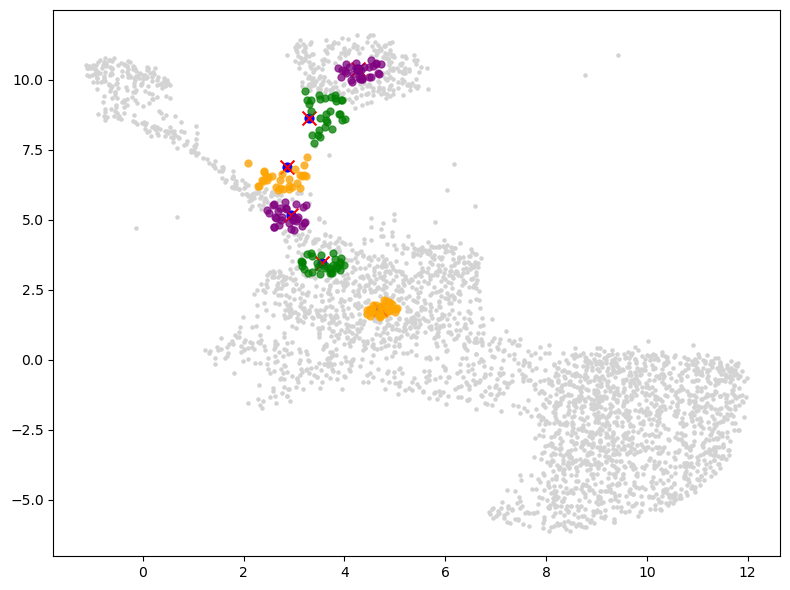

用的color_dict是： {'Melanophore': '#279e68', 'Other Glia': '#aa40fc', 'Pigment Progenitor': '#8c564b', 'Proliferating Progenitor': '#e377c2', 'Schwann Cell': '#17becf', 'Schwann Cell Precursor': '#aec7e8', 'Xanthophore': '#98df8a'}
用的celltype_colors是： ['#17becf', '#17becf', '#17becf', '#17becf', '#17becf', '#279e68', '#279e68', '#aec7e8', '#e377c2', '#98df8a', '#279e68', '#279e68', '#98df8a', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#98df8a', '#aec7e8', '#17becf', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#8c564b', '#279e68', '#17becf', '#17becf', '#17becf', '#279e68', '#98df8a', '#17becf', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#98df8a', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#279e68', '#17becf', '#279e68', '#98df8a', '#279e68', '#17becf', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#98df8a', '#

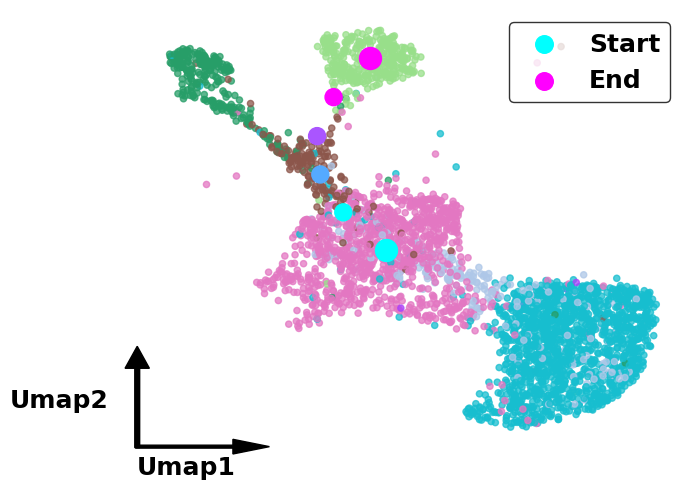

(3386,)
(3386,)
(30,)
(30,)


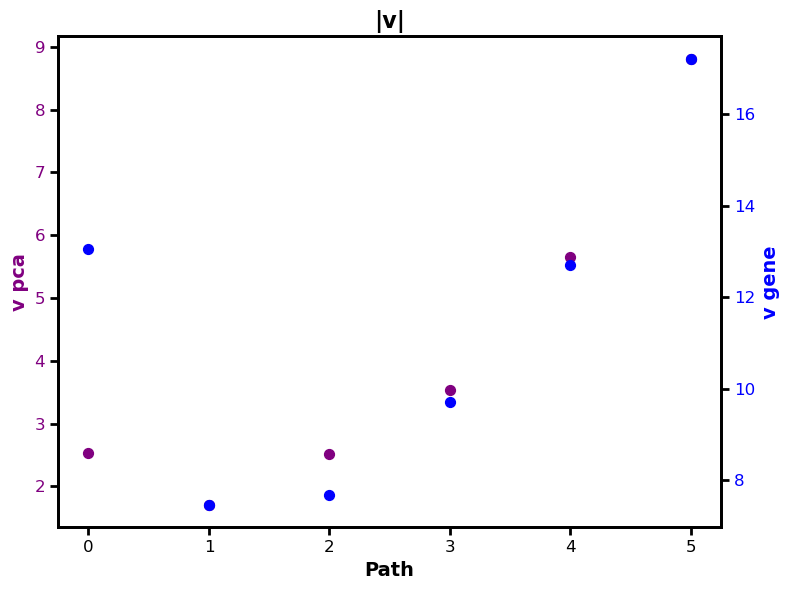

现在是直接用.autograd()求导的：


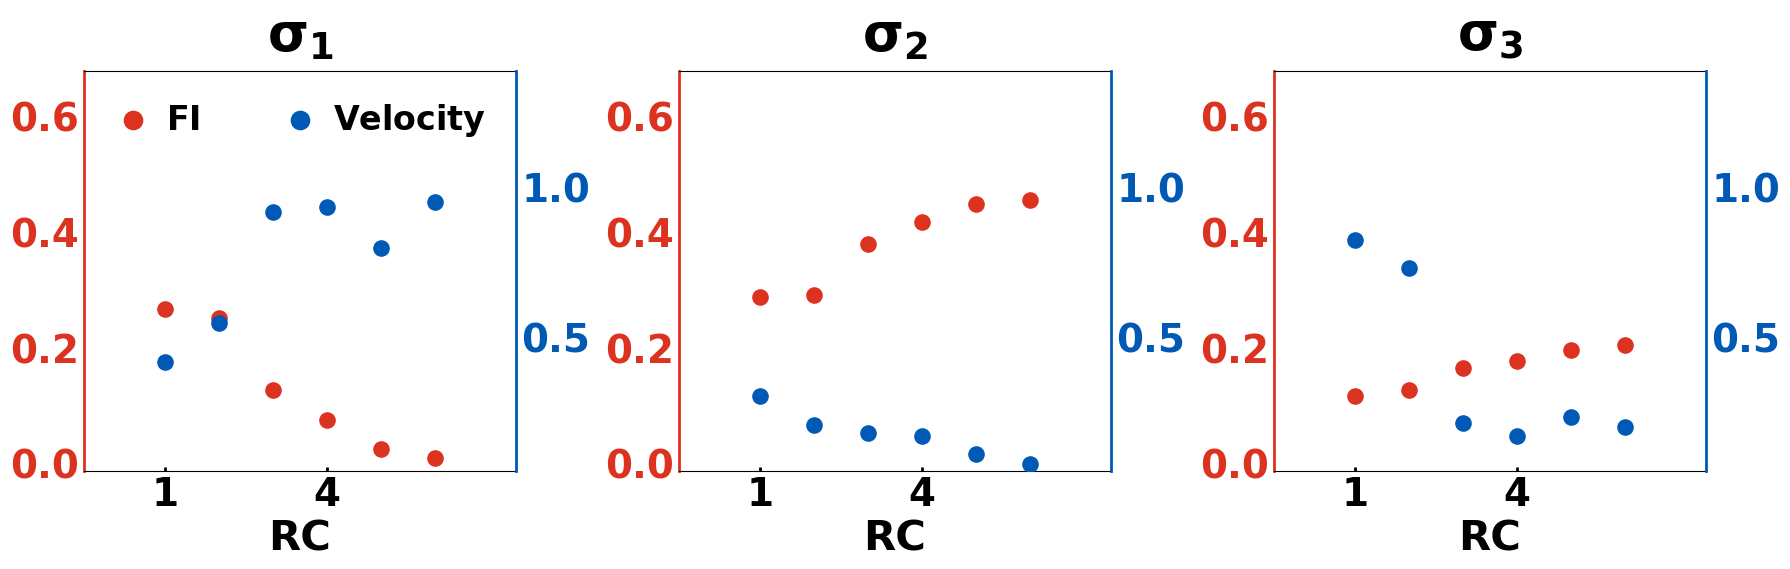

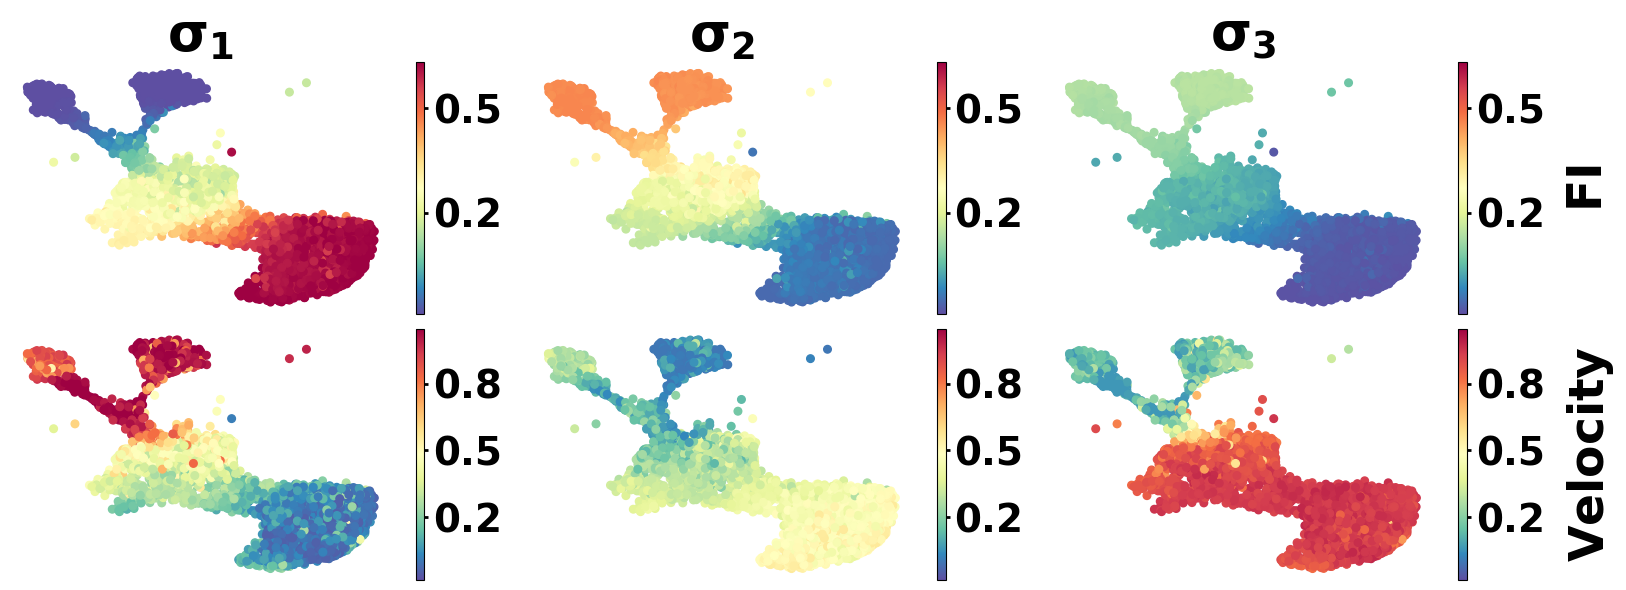

In [4]:
data_name = "zebrafish_dynamo_part"
[k_nei, K, L] = [20, 2, 3]
[pca_dim, k_rc, d_pca] = [50, 30, 10]

clusters_name = "celltype"
root_cluster = "Ngn3 low EP"
loc_path_graph = 'upper right'
basis = "umap"

branch = [ np.array(['Proliferating Progenitor', 'Schwann Cell Precursor', 'Schwann Cell']), 
          np.array(['Proliferating Progenitor', 'Pigment Progenitor', 'Melanophore']),
          np.array(['Proliferating Progenitor', 'Pigment Progenitor', 'Xanthophore']) ]
for t_list in (branch):
    branch_name = t_list[-1]

    adata0 = scv.read(data_path+data_name+'.h5ad', cache=True)
    adata = adata0.copy()
    scv.pp.pca(adata, n_comps=pca_dim)
    scv.pp.neighbors(adata, n_neighbors=k_nei)
    scv.pp.moments(adata, n_pcs=pca_dim, n_neighbors=k_nei)
    scv.tl.velocity(adata)
    print(adata)

    if branch_name == "Schwann Cell":
        nrc = 7
    else:
        nrc = 5

    # average_path = np.load(path_path + f'{data_name}_{branch_name}_P2M_rc_nrc_{nrc}_dpca_{d_pca}.npy') 
    # cell_arr, nearest_cell = find_nearest_indices_voronoi(adata = adata, path0= average_path, rc_distance= "X_pca", n_nei=k_rc, dim_n=10)
    # average_path = np.array(adata[nearest_cell].obsm["X_umap"])[:5]
    # cell_arr = cell_arr[:5] 
    for nrc in [6]:
        average_path = np.load(path_path + f'{data_name}_{branch_name}_P2M_rc_nrc_{nrc}.npy') 
        print("average_path.shape", average_path.shape)
        cell_arr, nearest_cell = find_nearest_indices_voronoi(adata = adata, path0= average_path, n_nei = k_rc, rc_distance= "X_umap")

        # fig = sc.pl.embedding(
        #     adata,
        #     # color=[clusters_name, "paga"],
        #     color=[clusters_name],
        #     basis="pca",
        #     color_map=cmap,
        #     return_fig=True
        # )

        X_pca = adata.obsm['X_pca']
        row = np.array([np.ones((k_nei,))*i for i in range(adata.shape[0])]).flatten()
        col = adata.uns['neighbors']['indices'].flatten()
        w_val = np.array([np.linalg.norm(X_pca[int(i),:]-X_pca[int(j),:]) for i,j in zip(row,col)])
        adj_val = np.ones(col.shape)
        A_mat = csr_matrix((adj_val, (row, col)), shape=(adata.shape[0], adata.shape[0]))
        A = A_mat
        W_mat = csr_matrix((w_val, (row, col)), shape=(adata.shape[0], adata.shape[0]))
        dc=np.mean(w_val)
        cell_nei=adata.uns['neighbors']['indices']
        nei_w=[]
        rho_arr=[]
        for ni in adata.uns['neighbors']['indices']:
            dij=np.array([np.linalg.norm(X_pca[int(ni[0]),:]-X_pca[int(i),:]) for i in ni[1:]])
            rho=np.sum(np.exp(-dij**2/dc**2))
            nei_w.append(np.exp(-dij**2/dc**2)/np.sum(np.exp(-dij**2/dc**2)))
            rho_arr.append(rho)
            
        rho_arr=np.array(rho_arr)/np.amax(rho_arr)
        nei_w=np.array(nei_w)
        nei_w=np.hstack((np.ones((nei_w.shape[0],1)),nei_w))/2

        def smooth_func(X_val,cell_nei=cell_nei,nei_w=nei_w):
            X_s=X_val.copy()
            for ci in range(len(X_val)):
                X_s[ci]=np.dot(X_val[cell_nei[ci,:]],nei_w[ci,:])
            return X_s

        if basis == "umap":
            X_umap = adata.obsm['X_umap']
            X_plt = X_umap[:,0]
            Y_plt = X_umap[:,1]
            X_min = np.min(X_plt)
            X_max = np.max(X_plt)
            Y_min = np.min(Y_plt)
            Y_max = np.max(Y_plt)
            X_len = (X_max-X_min)/5
            Y_len = (Y_max-Y_min)/5
            wid = min(X_len,Y_len)/30
            X_ori = X_min-wid*10
            Y_ori = Y_min-wid*10
        elif basis == "pca":
            X_umap = adata.obsm['X_pca'][:, :2]
            X_plt = X_umap[:,0]
            Y_plt = X_umap[:,1]
            X_min = np.min(X_plt)
            X_max = np.max(X_plt)
            Y_min = np.min(Y_plt)
            Y_max = np.max(Y_plt)
            X_len = (X_max-X_min)/5
            Y_len = (Y_max-Y_min)/5
            wid = min(X_len,Y_len)/30
            X_ori = X_min-wid*10
            Y_ori = Y_min-wid*10

        X = torch.tensor(adata.layers['Ms'], dtype=torch.float32) 
        Encoder_path = "/home/linux/桌面/Is single cell sloppy?/11_PAGA_spectrum/encoder/"
        # for pca in [X_pca, eigengene, hotspot]:

        velo_g, velo_pca = get_velocity(adata,pca_dim,k_nei)
        model_path = Encoder_path + data_name+' '+str([k_nei,K,L])+'/'
        # eigengene = np.load(f"{model_path}cell_eigen_X.npy")
        # hotspot = np.load(f"{model_path}cell_hs_X.npy")
        model_name = f"{model_path}encoder.pt"
        model = torch.load(f'{model_name}')

        # PART 1------算FI_mu/sigma
        mu, sigma = model(torch.tensor(X))
        mu_learned = mu.detach().numpy()
        sigma_learned = sigma.detach().numpy()
        Fisher_g=np.zeros((X.shape[0],L*2,L*2))
        for i in range(X.shape[0]):
            for j in range(L):
                Fisher_g[i,j,j]=1/sigma_learned[i,j]**2
                Fisher_g[i,L+j,L+j]=2/sigma_learned[i,j]**2
        Fisher_g_diag = np.zeros([X.shape[0],L*2])
        for i in range(X.shape[0]):
            Fisher_g_diag[i] = np.diag(Fisher_g[i])

        # PART 2------算dtheta_dt
        p_theta_p_gene = np.zeros([X.shape[0], L*2, X.shape[1]])
        for i in range(X.shape[0]):
            x0=torch.tensor(X[i,:],requires_grad=True)
            z_mu, z_sigma = model(x0)
            outputs = torch.cat([z_mu, z_sigma])
            grads = []
            for out in outputs:
                grad, = torch.autograd.grad(out, x0, retain_graph=True)
                grads.append(grad.detach().numpy())
            p_theta_p_gene[i, :, :] = np.stack(grads)
        dtheta_dt = np.einsum('ijk,ik->ij', p_theta_p_gene, velo_g)
        print("dtheta_dt.shape", dtheta_dt.shape)

        # 用.autograd()”的方式计算RC path上各点的 1.|v| [v_ms_autograd_average] 和 2.(gij) [FI_m_s_average].  
        # 画出的是对应的 gij vs |v|图
        
        # PART 3------ 把fisher inforamtion velocity归一化后作为权重
        # Fisher_g_diag = (Fisher_g_diag / Fisher_g_diag.max(axis=1, keepdims=True))
        Fisher_g_diag = (Fisher_g_diag / Fisher_g_diag.sum(axis=1, keepdims=True))
        print(Fisher_g_diag.shape)
        FI_m_s_average = np.zeros([len(cell_arr), 2*L])
        for i in range(len(cell_arr)):
            FI_m_s_path = Fisher_g_diag[cell_arr[i]]
            FI_m_s_average[i] = np.mean(FI_m_s_path, axis=0)
            if i == 0 :
                print(FI_m_s_path.shape)
        sorted_indices = sort_FI(FI_m_s_average[:,L:])

        # PART 4------ 把fisher inforamtion velocity归一化后作为权重
        # dtheta_dt = (np.abs(dtheta_dt) / np.abs(dtheta_dt).max(axis=1, keepdims=True))
        eps = 1e-8
        dtheta_dt = np.abs(dtheta_dt) / ( np.linalg.norm(dtheta_dt, axis=1, keepdims=True) + eps )
        print(dtheta_dt.shape)
        v_ms_autograd_average = np.zeros([len(cell_arr), 2*L])
        for i in range(len(cell_arr)):
            v_ms_path = np.abs(dtheta_dt)[cell_arr[i]] 
            v_ms_autograd_average[i] = np.mean(v_ms_path, axis=0)
            if i == 0 :
                print(v_ms_path.shape)



        # PART 5------show一下RC path
        # rc_path(adata, mu_learned, sigma_learned, average_path, basis, k_nei, data_name)
        cell_arr_plot(average_path, cell_arr, X_umap)
        rc_path_celltype(adata, average_path, basis, data_name, save = save, figure_path = figure_path, branch_name  = branch_name)

        # PART 6------比较一下velo_g和velo_pca
        v_gene_v_pca_rc(velo_g, velo_pca, cell_arr)

        # PART 7------画这部分的图
        print("现在是直接用.autograd()求导的：")
        rc_scatter(FI_m_s_average[:,L:][:, sorted_indices], v_ms_autograd_average[:,L:][:, sorted_indices], newMLP = False,
                save=save, figure_path=figure_path, branch_name = branch_name)

        FI_umap_double_grid(X_umap, adata, i, 
                            ( Fisher_g_diag[:,L:][:, sorted_indices] )**2, ( dtheta_dt[:,L:][:, sorted_indices] )**2, t_list,
                            cluster_key=clusters_name, k_nei = k_nei, data_name = data_name,
                            newMLP=False,
                            use_mask = False, save=save, figure_path=figure_path, branch_name = branch_name) 